In [2]:
# importing the dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
# loading the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [14]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

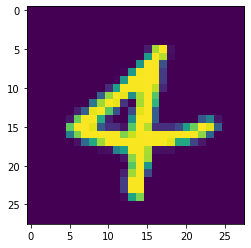

4


In [11]:
# showing a single image
plt.imshow(X_train[150])
plt.show()

# corresponding label
print(y_train[150])

In [13]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [15]:
# scaling the values (normalization)
X_train = X_train / 255
X_test = X_test / 255

In [16]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [22]:
# Building Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])


In [23]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
)

In [25]:
#training the neural network
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2983 - accuracy: 0.9138
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.9591
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1025 - accuracy: 0.9682
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0836 - accuracy: 0.9745
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0683 - accuracy: 0.9788
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0602 - accuracy: 0.9808
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0512 - accuracy: 0.9840
Epoch 8/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0458 - accuracy: 0.9858
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0401 - accuracy: 0.9866
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.03

In [26]:
model.save('model_01.h5')

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1418 - accuracy: 0.9741


In [28]:
print(loss, accuracy)

0.1417785882949829 0.9740999937057495
